# Logistic Regression on Tibia Image data

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, roc_auc_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


In [3]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier,early_stopping
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [4]:
# load preprocessed data
# Load preprocessed features
train_set = pd.read_csv("processed_train_data.csv")
test_set = pd.read_csv("processed_test.csv")
blinded_set = pd.read_csv("processed_blinded.csv")

In [8]:
# load file
test_file = pd.read_csv("../Data_file/test_set.csv")
blinded_file = pd.read_csv("../Data_file/blinded_test_set.csv")

In [10]:
test_id = test_file['ID']
blinded_id = blinded_file['ID']

In [13]:
train_set

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,CLASS
0,-20.254695,-11.823130,7.716862,-22.192462,11.197826,-4.493449,-8.297601,4.836435,-12.050268,4.323477,...,1.237971,4.141354,0.078479,0.183321,1.915560,-0.200344,-0.082856,0.986281,1.078308,0
1,32.305595,2.902575,13.719270,3.284687,0.318778,-3.328642,-11.057760,-6.648227,5.113819,1.323667,...,-0.620535,1.068192,-0.669716,-0.109740,0.422995,-2.013640,0.134023,1.033398,1.337861,1
2,23.381363,-21.144410,-5.660671,14.253208,-15.846635,1.857529,5.306571,5.460791,-4.488701,-0.488072,...,-0.507881,-1.599731,1.438878,0.470648,1.582101,0.513268,1.034832,-0.877964,1.432206,1
3,19.043432,-25.587721,-13.222623,7.755025,-6.590997,7.207803,7.963237,9.035006,-4.554078,1.242031,...,0.887455,1.168406,1.150717,0.783898,0.823143,0.017743,-0.470604,-1.364536,0.539822,0
4,-23.687445,1.828866,-9.794944,4.210438,-20.735913,11.579998,7.107506,-4.203560,0.861026,1.965857,...,-1.362658,-0.917914,2.580819,0.806721,0.521284,-0.491274,0.255756,-0.690738,-0.209101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,27.043973,12.709965,-6.176172,-12.037199,13.615935,-11.939834,-7.539671,11.643703,-1.649445,-2.663559,...,1.146871,1.413623,-0.112151,-0.620926,-0.910640,0.578056,-2.000807,-1.206298,-0.807743,0
311,26.222582,-14.252196,19.215742,1.460451,1.047792,-5.374006,-15.226595,-6.820422,-0.065914,2.108265,...,0.178957,-2.024610,-0.261054,1.727103,0.220496,0.736102,0.173338,-0.194116,0.340548,1
312,-36.812220,-1.832858,-4.354634,-4.883522,8.524470,0.794997,20.419363,1.419015,6.076603,13.536463,...,0.168211,0.523303,-0.762268,2.280616,0.700935,0.289251,-0.107174,-1.528718,1.182205,0
313,38.969967,33.209297,22.771808,-5.139838,4.823144,-15.215889,-33.647823,17.329430,-8.474156,4.884447,...,-2.019870,-1.710985,0.257130,1.513025,0.873007,-0.730550,-0.292175,-1.609126,-0.750611,1


In [14]:
# split train_set into X and y variable
X_train = train_set.drop(columns=["CLASS"])
y_train = train_set["CLASS"]

In [15]:
# split test set
X_test = test_set.drop(columns = ["CLASS"])
y_test = test_set["CLASS"]          

In [16]:
X_blinded = blinded_set

In [17]:
# logistic regression model
log_reg = LogisticRegression(solver='saga', max_iter=1000, class_weight='balanced')

In [18]:
# grid search for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [19]:
# use stratiifed cross validation, split into 5 parts
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [20]:
# use grid serch to find best hyper parameter
grid = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy')
grid.fit(X_train, y_train)

C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [23]:
# best model
best_model = grid.best_estimator_
print("Best hyperparameters:", grid.best_params_)
print("Best AUROC (CV):", grid.best_score_)

Best hyperparameters: {'C': 0.1, 'penalty': 'l1'}
Best AUROC (CV): 0.6507936507936508


### Evalute model performance on Test data

In [24]:
# get predicted probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

# apply custom threshold
threshold = 0.5
y_pred = (y_probs >= threshold).astype(int)

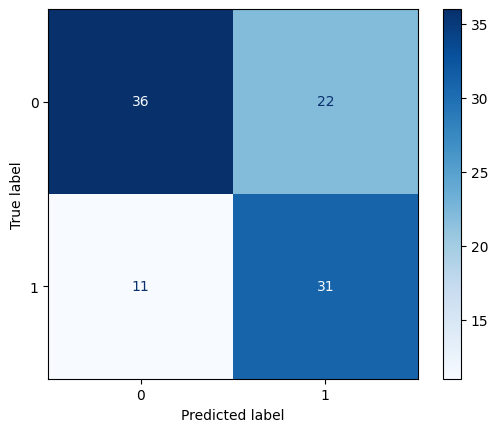

In [25]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [26]:
# Evaluation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUROC:", roc_auc_score(y_test, y_probs))
print("Sensitivity (Recall):", recall_score(y_test, y_pred))
print("Specificity:", tn / (tn + fp))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.67
AUROC: 0.7110016420361248
Sensitivity (Recall): 0.7380952380952381
Specificity: 0.6206896551724138
F1 Score: 0.6526315789473685


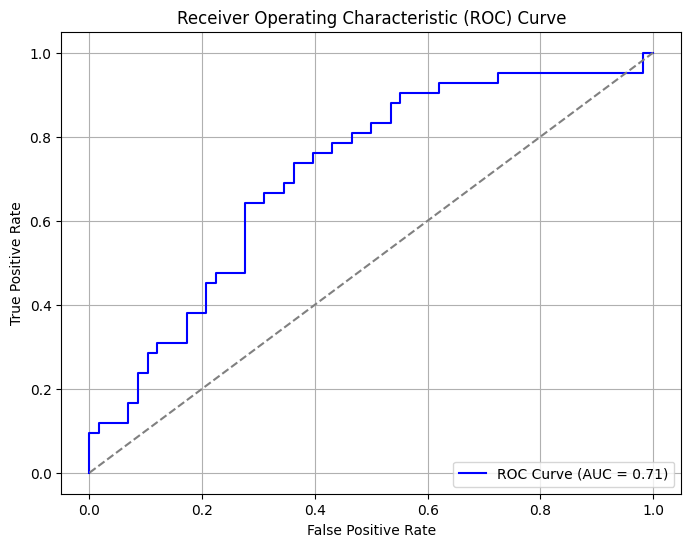

In [27]:
# Compute False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUROC
auc_score = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Evaluete model performance on blinded data

In [28]:
# get predicted probabilities
y_probs_blinded = best_model.predict_proba(X_blinded)[:, 1]

# apply custom threshold
y_pred_blinded = (y_probs_blinded >= threshold).astype(int)

In [29]:
y_pred_blinded

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

In [30]:
# make dataframe of test and blinded data id with prediction
test_output_file = pd.DataFrame({
    'ID': test_id,
    'Logistic_Prediction': y_pred
})

blinded_output_file = pd.DataFrame({
    'ID': blinded_id,
    'Logistic_Prediction': y_pred_blinded
})

# Random Forest Classification

In [33]:
# initialize base model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [34]:
# define hyper parameter
param_grid_rf = {
    'n_estimators': [80,100],       # Number of trees
    'max_depth': [4,5],       # Depth of trees
    'min_samples_split': [6,7],      # Minimum samples to split a node
    'min_samples_leaf': [1,2],        # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2'],     # Number of features to consider when looking for the best split
    'bootstrap': [True, False]            # Whether bootstrap samples are used
}

In [35]:
# cv for random forest
cv_rf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [36]:
# hyper parameter tuning with RansomizedSearchCV
search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    scoring='roc_auc',       # Metric to optimize
    n_iter=1000,               # Number of combinations to try
    cv=cv_rf,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [37]:
# fit search on training data
search_rf.fit(X_train, y_train)

C:\Users\User\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 64 is smaller than n_iter=1000. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 64 candidates, totalling 640 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 5],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [6, 7],
                                        'n_estimators': [80, 100]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [38]:
# best estimator
best_rf = search_rf.best_estimator_
print("Best Hyperparameters:", search_rf.best_params_)
print("Best AUROC (CV):", search_rf.best_score_)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}
Best AUROC (CV): 0.6457439271255061


In [39]:
# make prediction on test data
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]  
threshold = 0.45
y_pred_rf = (y_prob_rf >= threshold).astype(int)

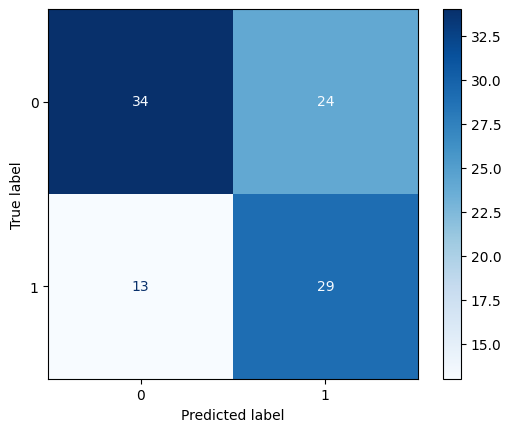

In [40]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [41]:
# Evaluation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUROC:", roc_auc_score(y_test, y_prob_rf))
print("Sensitivity (Recall):", recall_score(y_test, y_pred_rf))
print("Specificity:", tn / (tn + fp))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Accuracy: 0.63
AUROC: 0.6621510673234812
Sensitivity (Recall): 0.6904761904761905
Specificity: 0.5862068965517241
F1 Score: 0.6105263157894737


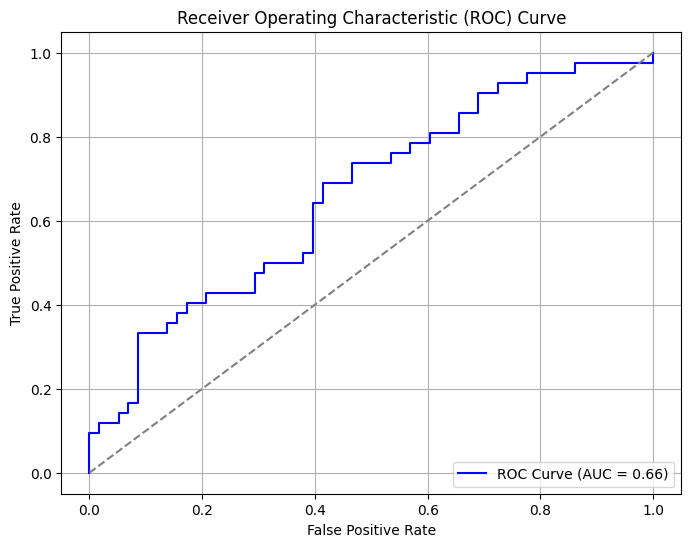

In [42]:
# Compute False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

# Compute AUROC
auc_score = roc_auc_score(y_test, y_prob_rf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [43]:
# get predicted probabilities
y_probs_blinded = best_rf.predict_proba(X_blinded)[:, 1]

# apply custom threshold
y_pred_blinded = (y_probs_blinded >= threshold).astype(int)

In [44]:
y_pred_blinded

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [45]:
test_output_file['RandomForest_Prediction'] = y_pred_rf
blinded_output_file['RandomForest_Prediction'] = y_pred_blinded

# Support Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC

In [48]:
# define SVM model 
svm = SVC(probability = True, random_state = 42, class_weight='balanced')

In [49]:
# HYPER PARAMETER GRID
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],

}

In [50]:
# cross-validation strategy
cv_svm = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [51]:
# grid search
grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    scoring='roc_auc',
    cv=cv_svm,
    verbose=1,
    n_jobs=-1
)

In [52]:
# fit on training data
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc', verbose=1)

In [53]:
# Best model and parameters
print("Best parameters found:", grid_svm.best_params_)
print("Best ROC AUC:", grid_svm.best_score_)

Best parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best ROC AUC: 0.6709325236167342


In [54]:
# Predict on test data
y_prob_svm = grid_svm.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_svm = (y_prob_svm >= threshold).astype(int)

In [55]:
# Evaluation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("AUROC:", roc_auc_score(y_test, y_prob_svm))
print("Sensitivity (Recall):", recall_score(y_test, y_pred_svm))
print("Specificity:", tn / (tn + fp))
print("F1 Score:", f1_score(y_test, y_pred_svm))

Accuracy: 0.6
AUROC: 0.7118226600985221
Sensitivity (Recall): 0.7619047619047619
Specificity: 0.4827586206896552
F1 Score: 0.6153846153846154


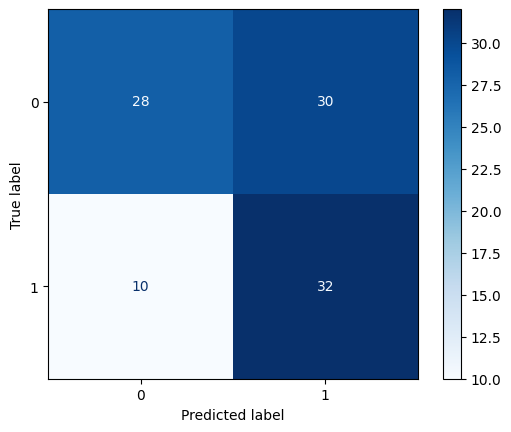

In [56]:
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

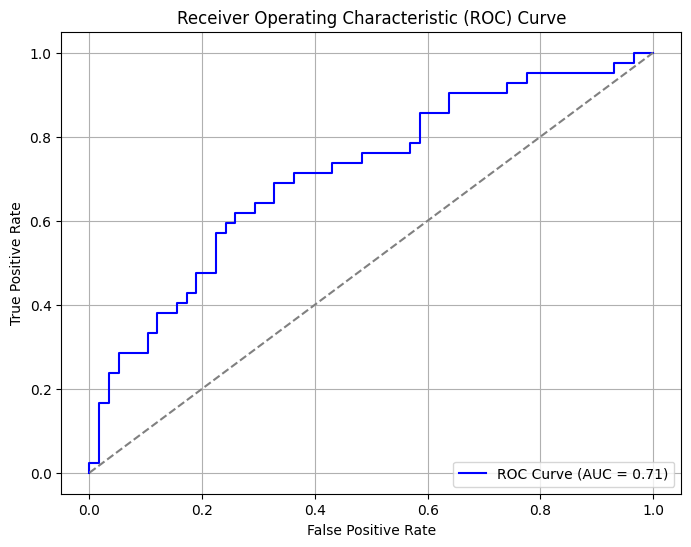

In [57]:
# Compute False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)

# Compute AUROC
auc_score = roc_auc_score(y_test, y_prob_svm)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [59]:
# get predicted probabilities
y_probs_blinded = grid_svm.predict_proba(X_blinded)[:, 1]

# apply custom threshold
y_pred_blinded = (y_probs_blinded >= threshold).astype(int)

print(y_pred_blinded)

[0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0]


In [60]:
test_output_file['SVM_Prediction'] = y_pred_svm
blinded_output_file['SVM_Prediction'] = y_pred_blinded

# Stack Classifier

In [61]:
# stacking classifier
stack = StackingClassifier(
    estimators=[
        ('lr', best_model),
        ('rf', best_rf),
        ('svm', grid_svm)
    ],
    final_estimator=LogisticRegression(),
    cv=10,
    n_jobs=-1
)

In [62]:
# train stack_model
stack.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('lr',
                                LogisticRegression(C=0.1,
                                                   class_weight='balanced',
                                                   max_iter=1000, penalty='l1',
                                                   solver='saga')),
                               ('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=5,
                                                       min_samples_split=7,
                                                       random_state=42)),
                               ('svm',
                                GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                             estimator=SVC(class_weight='balanced',
                                                           probability=True,
                                                           random_state=42),
                                             n_jobs=-1,
                                             param_grid={'C': [0.01, 0.1, 1, 10,
                                                               100],
                                                         'gamma': ['scale',
                                                                   'auto'],
                                                         'kernel': ['linear',
                                                                    'rbf']},
                                             scoring='roc_auc', verbose=1))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [63]:
# predict on test data
y_pred_stack = stack.predict(X_test)
y_prob_stack = stack.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_stack = (y_prob_stack >= threshold).astype(int)

In [64]:
# Evaluation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_stack).ravel()
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("AUROC:", roc_auc_score(y_test, y_prob_stack))
print("Sensitivity (Recall):", recall_score(y_test, y_pred_stack))
print("Specificity:", tn / (tn + fp))
print("F1 Score:", f1_score(y_test, y_pred_stack))

Accuracy: 0.67
AUROC: 0.7093596059113301
Sensitivity (Recall): 0.7619047619047619
Specificity: 0.603448275862069
F1 Score: 0.6597938144329897


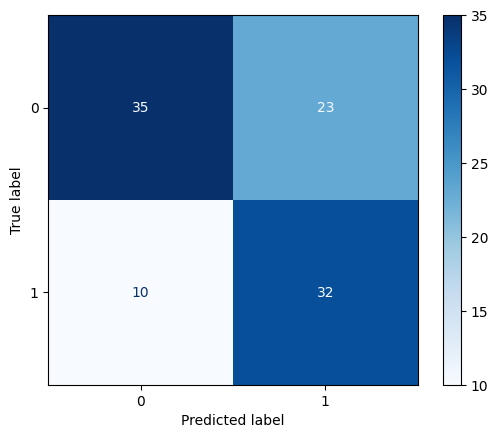

In [65]:
cm = confusion_matrix(y_test, y_pred_stack)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

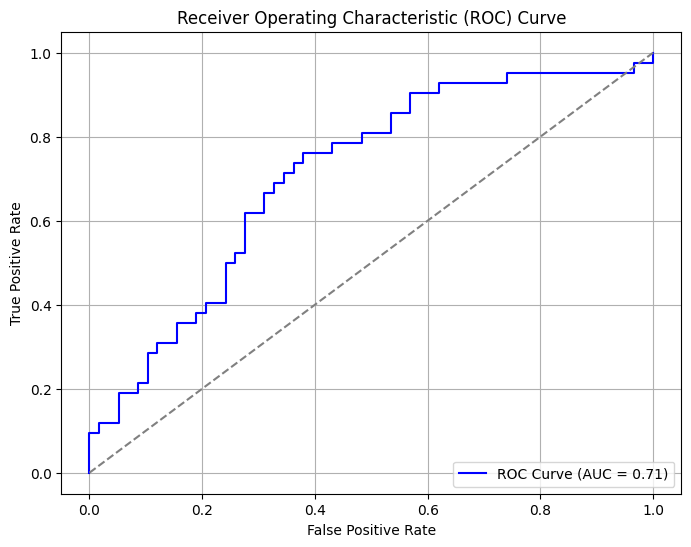

In [66]:
# Compute False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob_stack)

# Compute AUROC
auc_score = roc_auc_score(y_test, y_prob_stack)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [67]:
# get predicted probabilities
y_probs_blinded = stack.predict_proba(X_blinded)[:, 1]

# apply custom threshold
y_pred_blinded = (y_probs_blinded >= threshold).astype(int)

print(y_pred_blinded)

[0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0]


In [68]:
test_output_file['Stack_model_Prediction'] = y_pred_stack
blinded_output_file['Stack_model_Prediction'] = y_pred_blinded

In [72]:
#test_output_file

In [71]:
#blinded_output_file

In [73]:
# Save test output
test_output_file.to_csv("../Output_folder/test_predictions.csv", index=False)

# Save blinded output
blinded_output_file.to_csv("../Output_folder/blinded_predictions.csv", index=False)
